In [1]:
import pandas as pd 
import numpy as np 
from optimisation_utiles import * 
from grm_utiles import * 
import matplotlib.pyplot as plt

In [2]:
df_return = pd.read_csv('GRM_returns.csv')

In [3]:
df_return_test = df_return.iloc[-500:].set_index('Date')

In [4]:
df_return_test

,BNPIESTV,BNPIEMTV,BNPIRPEE,BNPIRPUE,BNPIRPLE,BNPIRPJE,BNPIRPHE,BNPIRPAE,BNPIV1EE,BNPIV1UE,...,BNPXCRME,BNPXCRMU,BNPIPQEE,BNPIPQUE,BNPIPRX3,BNPIDRXA,BPFXSTGU,BNPITIEG,BNPICCUE,BNPICCEE
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-05,0.000000,0.000000,0.009138,0.000000,0.010517,0.004987,0.009759,0.005232,0.028481,0.000000,...,0.000636,0.000000,0.001222,-0.000081,0.003084,0.000491,0.000150,-0.000084,0.000000,-0.001708
2018-12-06,0.027581,0.014453,0.027976,0.001998,0.028460,0.012743,0.015484,0.001146,0.111702,0.011814,...,0.004259,0.010617,0.002202,0.002382,0.002305,0.008697,0.000388,0.000109,-0.000415,-0.005873
2018-12-07,0.051208,0.022888,-0.007577,0.011982,-0.012043,-0.004896,0.003368,-0.001886,-0.028289,0.046835,...,-0.001223,-0.006564,0.003353,-0.002278,0.004584,-0.013254,-0.000400,0.000430,-0.002996,0.001826
2018-12-10,-0.003491,-0.000274,0.012836,-0.002297,0.006439,0.013720,0.008325,0.015474,0.032492,-0.009143,...,0.005573,0.007713,-0.002100,0.004421,-0.002747,-0.001730,-0.002114,-0.000105,0.000599,-0.002829
2018-12-11,-0.007822,-0.003990,-0.012846,0.000131,-0.011007,0.000259,0.000957,-0.004953,-0.024654,0.002345,...,-0.005168,-0.005621,-0.000647,0.002529,0.000908,0.008658,-0.000608,0.000174,0.000021,0.002831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,0.126493,0.041646,0.023843,0.016057,0.018062,0.001215,0.003358,0.000118,0.088715,0.089444,...,-0.003635,0.000094,0.001429,0.005459,0.000394,0.006373,0.001907,-0.005170,-0.002810,-0.006136
2020-10-29,-0.071799,-0.030799,-0.001255,-0.006618,-0.001388,0.003016,-0.000450,0.010107,-0.018065,-0.036658,...,-0.001484,0.001252,0.000925,-0.006045,0.000183,0.001857,0.002216,-0.000955,0.001840,0.000156
2020-10-30,0.057504,0.030006,-0.002684,0.003936,-0.002002,0.009617,0.009665,0.003646,-0.021456,0.014964,...,-0.001702,0.000905,0.000202,0.003478,0.000261,0.003987,0.000122,0.002158,-0.000541,0.000809


In [5]:
results = portfolio_optimisation(df_return_test, 
                                 target='max_dd',
                                 grm_bound={'first_risk': [0.1, 0.3], 'defensive_factors': [0.1, 0.3], 'trend': [0.1, 0.4], 'tail_risk': [0.1, 0.4]})

In [6]:
sum(list(results['weights'].values())[0:11])

0.11391781325343106

In [7]:
sum(list(results['weights'].values())[11:20])

0.23760620890763323

In [8]:
sum(list(results['weights'].values())[20:26])

0.36982337133794946

In [9]:
sum(list(results['weights'].values())[26:30])

0.2786526065009865

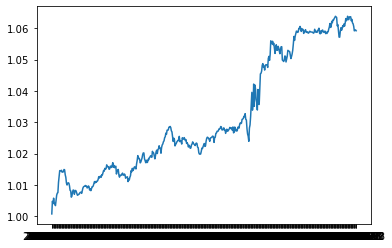

In [17]:
plt.plot((1+(results['weights'] * df_return_test).sum(axis=1)).cumprod())

In [19]:
max_drawdown(perf)

0.45504367581306604

In [41]:
max_drawdown((1+(df_return_test * np.array(list(results['weights'].values()))).sum(axis=1)).cumprod())

0.013386041901269881